In [0]:
import torch as t
import torchvision
import torchvision.transforms as tf
import torch.nn.functional as f
from torch.autograd import Variable
import torch.nn as nn
from torchvision import datasets

In [0]:
from google.colab import files

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io


In [0]:
transform=tf.Compose([tf.ToTensor(),tf.Normalize((0.5,),(0.5,))])

In [0]:
data=datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)

In [0]:
dataloader=t.utils.data.DataLoader(data,shuffle=True,batch_size=64)

In [0]:
datatrain=next(iter(dataloader))
images,labels=datatrain
images=images.reshape(images.shape[0],-1)
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
                   

loss_cross=nn.CrossEntropyLoss()
lr=0.0001
optimizer=t.optim.SGD(model.parameters(),lr=lr)
loss_list=[]
iterations=10000
for i in range(iterations):
  optimizer.zero_grad()
  results=model(images)
  loss=loss_cross(results,labels)
  loss.backward()
  loss_list.append(loss)
  optimizer.step()
  
  
    

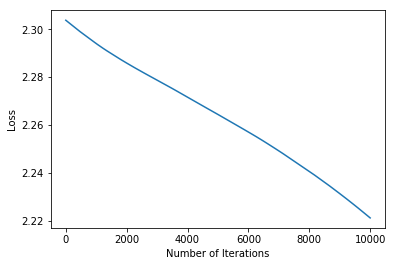

In [13]:
plt.plot(range(iterations),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()